<a href="https://colab.research.google.com/github/Harsha-m416/Stanford_Dogs_Data/blob/main/Data_Mining_Programming_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import os
import numpy as np
import pandas as pd
import warnings

from PIL import Image
from skimage.color import rgb2gray
import xml.etree.ElementTree as ET
from skimage import io, exposure, filters

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVR

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold


import matplotlib.pyplot as plt

In [71]:
warnings.filterwarnings("ignore")

## Resize and Crop

In [72]:
def angle(dx, dy):
    """Calculate the angles between horizontal and vertical operators."""
    return np.mod(np.arctan2(dy, dx), np.pi)

In [73]:
image_dir = "/content/drive/MyDrive/data_mining/mulinti_images"
annotation_dir = "/content/drive/MyDrive/data_mining/mulinti_annotation"

In [74]:
class_names = ['Basenji','Airedale','Brittany_spaniel','Bouvier_des_flandres']

In [75]:
class_names

['Basenji', 'Airedale', 'Brittany_spaniel', 'Bouvier_des_flandres']

In [76]:
class_paths = []
for i in os.listdir(image_dir):
  for j in class_names:
    if j.lower() in i.lower():
      class_paths.append(i)

In [77]:
class_paths

['n02106382-Bouvier_des_Flandres',
 'n02101388-Brittany_spaniel',
 'n02096051-Airedale',
 'n02110806-basenji']

## Edge histogram Data

In [78]:
df = pd.DataFrame(columns = list(range(0,36))+['class'])
for class_ in class_paths:
  class_path = os.path.join(new_dir,class_)
  for filename in os.listdir(class_path):
    img = io.imread(os.path.join(class_path,filename))
    gray_sacle = rgb2gray(img)
    angle_sobel = angle(filters.sobel_h(gray_sacle),
                    filters.sobel_v(gray_sacle))
    hist,bins = exposure.histogram(angle_sobel,nbins=36)
    for i in class_names:
      if i.lower() in class_.lower():
        break
    df.loc[len(df)] = list(hist)+[class_names.index(i)]




In [79]:
df.to_csv("/content/drive/MyDrive/data_mining/edge_data.csv")

## Split into Test Train

In [80]:
X = np.array(df[df.columns[:-1]])
y = np.array(df['class'])

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## Scale

In [82]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [83]:
scalled_x_train = scaler.transform(X_train)
scalled_x_test = scaler.transform(X_test)

## KNN K-fold

In [84]:
mean_val_errors_std = []
mean_val_errors_strat = []
mean_train_errors_std = []
mean_train_errors_strat = []
k_values = [1, 3, 5, 7, 10, 20]
for k in k_values:
    # Standard 5-fold cross-validation
    kf = KFold(n_splits=5)
    knn = KNeighborsClassifier(n_neighbors=k)
    val_scores_std = cross_val_score(knn, scalled_x_train, y_train, cv=kf)
    train_scores_std = knn.fit(scalled_x_train, y_train).score(scalled_x_train, y_train)
    mean_val_errors_std.append(1 - np.mean(val_scores_std))
    mean_train_errors_std.append(1 - train_scores_std)
    print(f"Standard 5-fold CV, k={k}: Train accuracy: {train_scores_std},Val accuracy: {np.mean(val_scores_std)}")

    skf = StratifiedKFold(n_splits=5)
    val_scores_strat = cross_val_score(knn, scalled_x_train, y_train, cv=skf)
    train_scores_strat = knn.fit(scalled_x_train, y_train).score(scalled_x_train, y_train)
    mean_val_errors_strat.append(1 - np.mean(val_scores_strat))
    mean_train_errors_strat.append(1 - train_scores_strat)
    print(f"Stratified 5-fold CV, k={k}: Train accuracy: {train_scores_strat},Val accuracy {np.mean(val_scores_strat)}")


Standard 5-fold CV, k=1: Train accuracy: 0.9912280701754386,Val accuracy: 0.2912280701754386
Stratified 5-fold CV, k=1: Train accuracy: 0.9912280701754386,Val accuracy 0.3
Standard 5-fold CV, k=3: Train accuracy: 0.5929824561403508,Val accuracy: 0.3070175438596491
Stratified 5-fold CV, k=3: Train accuracy: 0.5929824561403508,Val accuracy 0.30701754385964913
Standard 5-fold CV, k=5: Train accuracy: 0.5385964912280702,Val accuracy: 0.32105263157894737
Stratified 5-fold CV, k=5: Train accuracy: 0.5385964912280702,Val accuracy 0.33508771929824566
Standard 5-fold CV, k=7: Train accuracy: 0.47017543859649125,Val accuracy: 0.3017543859649122
Stratified 5-fold CV, k=7: Train accuracy: 0.47017543859649125,Val accuracy 0.32456140350877194
Standard 5-fold CV, k=10: Train accuracy: 0.44035087719298244,Val accuracy: 0.3140350877192982
Stratified 5-fold CV, k=10: Train accuracy: 0.44035087719298244,Val accuracy 0.3385964912280702
Standard 5-fold CV, k=20: Train accuracy: 0.4245614035087719,Val accur

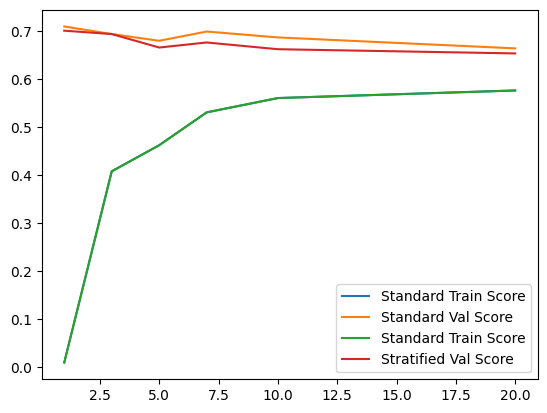

In [85]:
fig,ax = plt.subplots()
ax.plot(k_values,mean_train_errors_std,label="Standard Train Score")
ax.plot(k_values,mean_val_errors_std,label="Standard Val Score")
ax.plot(k_values,mean_train_errors_strat,label="Standard Train Score")
ax.plot(k_values,mean_val_errors_strat,label="Stratified Val Score")
ax.legend()
plt.show()

In [86]:
print(f"Lowest Standrad Training mean Error is {np.min(mean_train_errors_std)} at  k =  {k_values[np.argmin(mean_train_errors_std)]}")
print(f"Lowest Standrad Val mean Error is {np.min(mean_val_errors_std)}  at  k = {k_values[np.argmin(mean_val_errors_std)]}")
print(f"Lowest Stratified Training mean Error is {np.min(mean_train_errors_strat)} at k = {k_values[np.argmin(mean_train_errors_strat)]}")
print(f"Lowest Stratified Val mean Error is {np.min(mean_val_errors_strat)} at k = {k_values[np.argmin(mean_val_errors_strat)]}")

Lowest Standrad Training mean Error is 0.00877192982456143 at  k =  1
Lowest Standrad Val mean Error is 0.6631578947368422  at  k = 20
Lowest Stratified Training mean Error is 0.00877192982456143 at k = 1
Lowest Stratified Val mean Error is 0.6526315789473685 at k = 20


Overfiting at K =1 as Train error is low and val error is high.

As Stratified Val error is lowest at k + 20

In [87]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(scalled_x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [88]:
error = 1- knn.score(scalled_x_test,y_test)

In [89]:
error

0.6923076923076923

Test Score = 0.6013986013986015

## Performance Comparison

In [90]:
from sklearn.metrics import accuracy_score

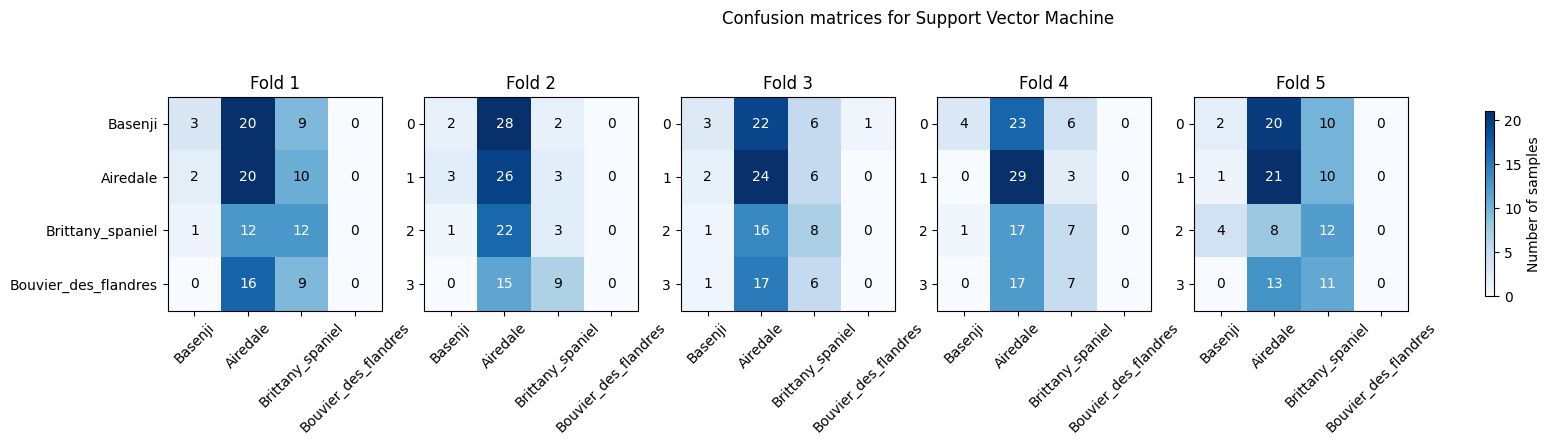

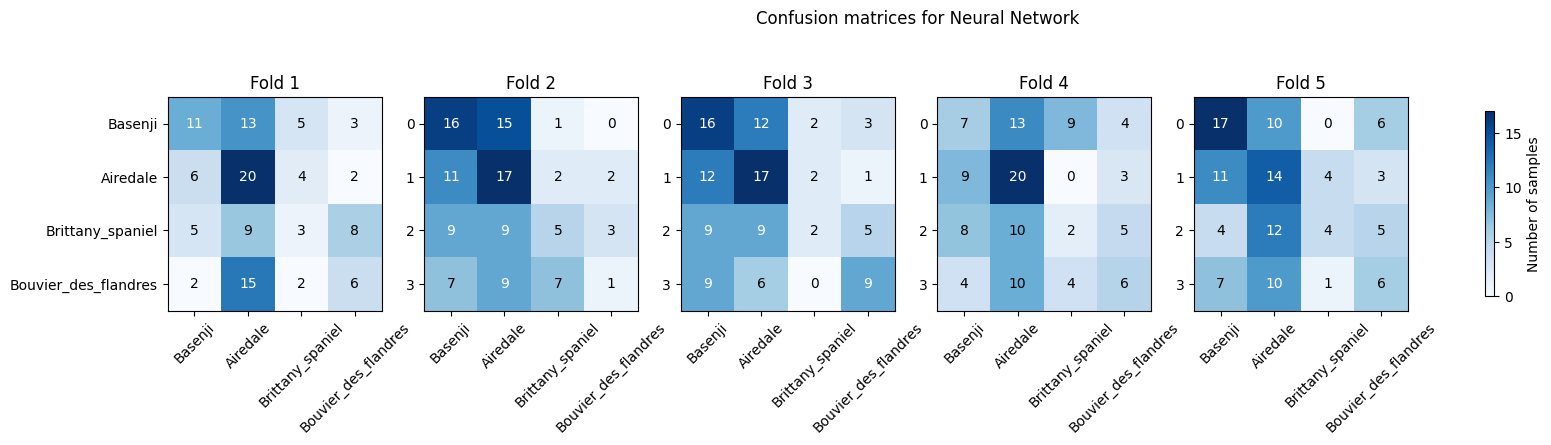

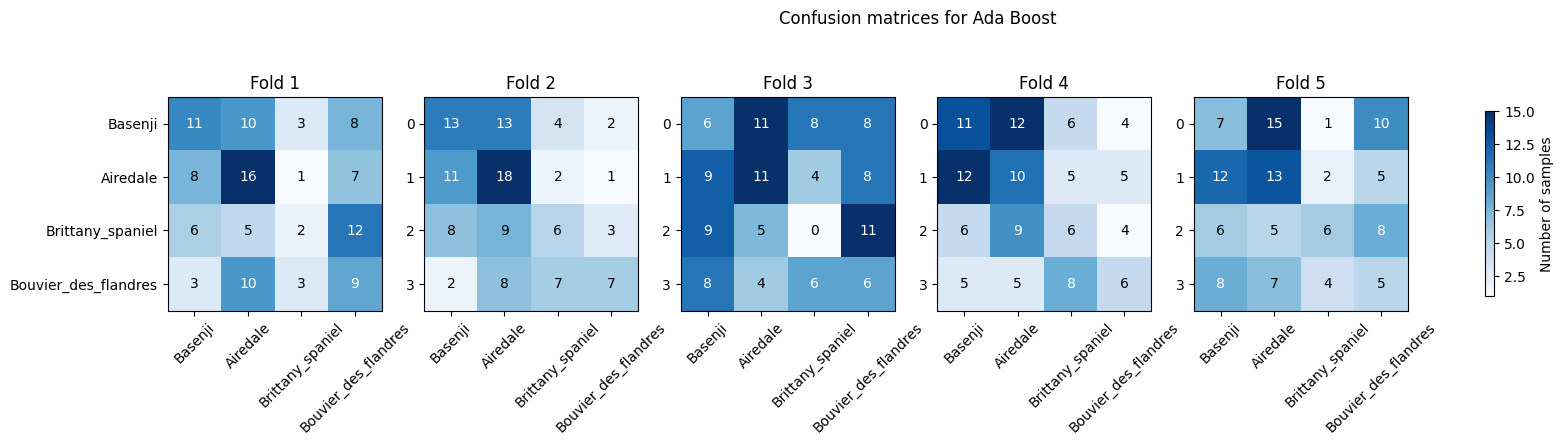

In [91]:
classifiers = {
    'Support Vector Machine': LinearSVR(),
    'Neural Network': MLPClassifier(hidden_layer_sizes = (10, 10, 10, )),
    'Ada Boost': AdaBoostClassifier()
}

# Define class labels
class_labels = class_names #class_names

# Define stratified 5-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and plot confusion matrices
val_scores_all = []
for clf_name, clf in classifiers.items():
    fig, axes = plt.subplots(1, 5, figsize=(20,4))
    val_classifier_score = []
    for fold, (start_train_index, val_index) in enumerate(skf.split(scalled_x_train, y_train)):
        X_start_train, X_val = scalled_x_train[start_train_index], scalled_x_train[val_index]
        y_start_train, y_val = y_train[start_train_index], y_train[val_index]

        # Train classifier
        clf.fit(X_start_train, y_start_train)

        # Predict on val set
        y_pred = clf.predict(X_val)
        if clf_name == "Support Vector Machine":
          y_pred = np.round(y_pred)

        val_k_fold_score= accuracy_score(y_val,y_pred)
        val_classifier_score.append(val_k_fold_score)


        # Calculate confusion matrix
        cm = confusion_matrix(y_val, y_pred, labels=np.unique(y))

        # Plot confusion matrix
        ax = axes[fold]
        im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

        # Add labels
        ax.set_xticks(np.arange(len(class_labels)))
        ax.set_yticks(np.arange(len(class_labels)))
        ax.set_xticklabels(class_labels,rotation=45)
        if fold==0:
          ax.set_yticklabels(class_labels)
        ax.set_title(f'Fold {fold+1}')

        # Add text annotations
        for i in range(len(class_labels)):
            for j in range(len(class_labels)):
                ax.text(j, i, str(cm[i, j]), ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')
    val_scores_all.append((clf_name,val_classifier_score))

    # Add color bar
    cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6)
    cbar.ax.set_ylabel('Number of samples')

    # Add title
    fig.suptitle(f'Confusion matrices for {clf_name}')

    # Adjust layout
    # plt.tight_layout()
    plt.show()

7)i) Based on the Confusion matrix visualization neural netwrok as the it has best diagonal values for all class, even though the decision trees have max values for one class but for other classes the values are low.

In [92]:
for clf_name, scores in val_scores_all:
  print(f"{clf_name} Mean Val accuracy accross K folds {np.mean(scores)}")

Support Vector Machine Mean Val accuracy accross K folds 0.3087719298245614
Neural Network Mean Val accuracy accross K folds 0.3491228070175439
Ada Boost Mean Val accuracy accross K folds 0.2964912280701754


7)ii) neural network is best method based on the mean validation accuracies

In [93]:
from sklearn.metrics import f1_score

In [94]:
scores = []
f_scores = []
for clf_name, clf in classifiers.items():
  clf.fit(scalled_x_train,y_train)
  y_pred = clf.predict(scalled_x_test)
  if clf_name == "Support Vector Machine":
    y_pred = np.round(y_pred)
  score = accuracy_score(y_test,y_pred)
  f1_micro = f1_score(y_test, y_pred, average='micro')

  f1_macro = f1_score(y_test, y_pred, average='macro')

  f1_weighted = f1_score(y_test, y_pred, average='weighted')

  scores.append(score)
  f_scores.append(np.mean([f1_micro,f1_macro,f1_weighted]))





In [95]:
for clf_name, acc, f1 in zip(classifiers,scores,f_scores):
  print(f"{clf_name} has Test accuracy  {acc} and F1 score {f1}")


Support Vector Machine has Test accuracy  0.27972027972027974 and F1 score 0.2139443561093705
Neural Network has Test accuracy  0.3006993006993007 and F1 score 0.2694918894974389
Ada Boost has Test accuracy  0.3916083916083916 and F1 score 0.37452957363629813


7)iii)&iv) Ada Boost is best in both Test accuracy and F1 score